In [1]:
import ptc_track.optics_parameters as mop
import ptc_track.madx_configuration as mc
import approximator.optics_parameters as aop
import approximator.runner as ap_runner
import data.bunch_configuration as buc
import visualization.optics_parameter_visualisation as opv
import numpy as np
import matplotlib.pyplot as plt
import sys
import seaborn as sns
import ROOT
import os
from ROOT import gSystem, gInterpreter
import data.bunch_configuration as buc

sns.set_style("whitegrid")

Welcome to JupyROOT 6.18/00


In [2]:
path_to_project = "/eos/user/r/rmucha/SWAN_projects"
folder_name = "2017_nominal"
script_file_name = "inputmadx_nominal.madx"
xml_file_name = "configuration_reco_beam1.xml"
path_to_configuration = os.path.join(path_to_project, folder_name)
path_to_xml_file = os.path.join(path_to_project, folder_name, xml_file_name)
item_number = 2
track_configuration = mc.TrackConfiguration(path_to_xml_file, item_number, path_to_configuration)

In [3]:
home = "/eos/user/r/rmucha/SWAN_projects"
file_name = "parametrization_6500GeV_0p4_185_reco"
approximator_name = "ip5_to_station_220_h_2_lhcb1"
path_to_project = home+"/optics_generator_python"
path_to_file = home+"/2017_nominal/" + file_name + ".root"
approximator = ap_runner.get_approximator(path_to_project, path_to_file, approximator_name)

In [4]:
# Parameters of bunch
x_mean = 0.0
sigma_x = 0
theta_x_mean = 1.5e-4
sigma_theta_x = 0
y_mean = -1.5e-3
sigma_y = 0
theta_y_mean = 0.00
sigma_theta_y = 0
pt_mean = -0.15
sigma_pt = 0.2

number_of_x_values = 1
number_of_theta_x_values = 1
number_of_y_values = 1
number_of_theta_y_values = 1
number_of_pt_values = 100

In [5]:
subtitle = file_name + "\n" + approximator_name
plot_size = 5
grid_x_resolution = 5
grid_y_resolution = 7

In [6]:
bunch_configuration = buc.BunchConfiguration.from_sigma(x_mean, sigma_x, number_of_x_values,
                                                        theta_x_mean, sigma_theta_x, number_of_theta_x_values,
                                                        y_mean, sigma_y, number_of_y_values,
                                                        theta_y_mean, sigma_theta_y, number_of_theta_y_values,
                                                        pt_mean, sigma_pt, number_of_pt_values)
bunch_configuration1 = bunch_configuration

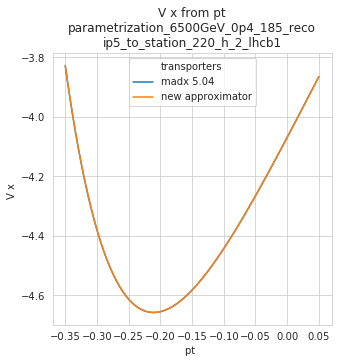

In [7]:
transporters = {
    "madx 5.04": (mop.compute_v_x, track_configuration),
    "new approximator": (aop.compute_v_x, approximator),
#     "old approximator": (aop.compute_v_x, approximator_vale)
}
opv.plot_optical_functions(bunch_configuration, transporters, "pt", "V x", subtitle)

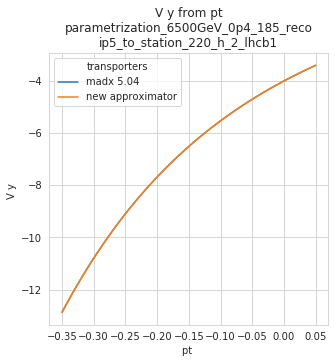

In [8]:
transporters = {
    "madx 5.04": (mop.compute_v_y, track_configuration),
    "new approximator": (aop.compute_v_y, approximator),
#     "old approximator": (aop.compute_v_y, approximator_vale)
}
opv.plot_optical_functions(bunch_configuration, transporters, "pt", "V y", subtitle)

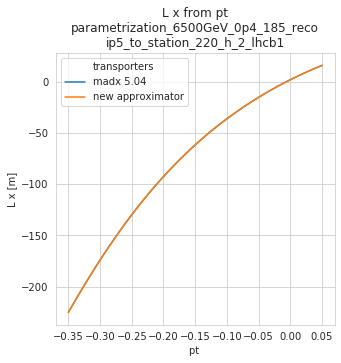

In [9]:
transporters = {
    "madx 5.04": (mop.compute_l_x, track_configuration),
    "new approximator": (aop.compute_l_x, approximator),
#     "old approximator": (aop.compute_l_x, approximator_vale)
}
opv.plot_optical_functions(bunch_configuration, transporters, "pt", "L x", subtitle)

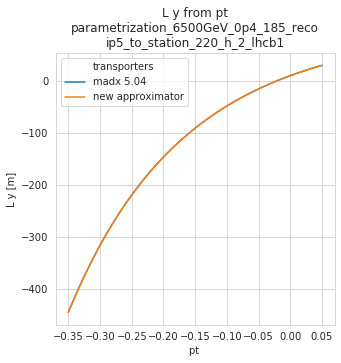

In [10]:
transporters = {
    "madx 5.04": (mop.compute_l_y, track_configuration),
    "new approximator": (aop.compute_l_y, approximator),
#     "old approximator": (aop.compute_l_y, approximator_vale)
}
opv.plot_optical_functions(bunch_configuration, transporters, "pt", "L y", subtitle)

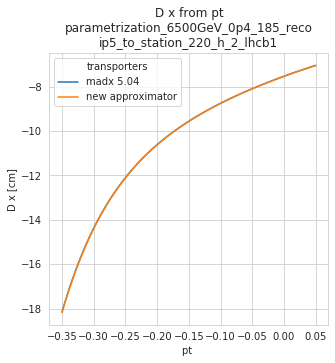

In [11]:
transporters = {
    "madx 5.04": (mop.compute_d_x, track_configuration),
    "new approximator": (aop.compute_d_x, approximator),
#     "old approximator": (aop.compute_d_x, approximator_vale)
}
opv.plot_optical_functions(bunch_configuration, transporters, "pt", "D x", subtitle)

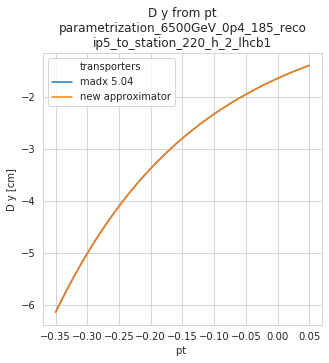

In [12]:
transporters = {
    "madx 5.04": (mop.compute_d_y, track_configuration),
    "new approximator": (aop.compute_d_y, approximator),
#     "old approximator": (aop.compute_d_y, approximator_vale)
}
opv.plot_optical_functions(bunch_configuration, transporters, "pt", "D y", subtitle)